<a href="https://colab.research.google.com/github/purnimathamilselvan/analytics/blob/main/classification_model_finance_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the CSV file**

In [ ]:
!wget -O cwk_data_20661864.csv "https://drive.google.com/uc?export=download&id=1O_x6DMJqlt1VfCViOUKoFC2UBi-uiVVT"

--2025-01-04 23:34:13--  https://drive.google.com/uc?export=download&id=1O_x6DMJqlt1VfCViOUKoFC2UBi-uiVVT
Resolving drive.google.com (drive.google.com)... 74.125.201.100, 74.125.201.139, 74.125.201.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.201.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1O_x6DMJqlt1VfCViOUKoFC2UBi-uiVVT&export=download [following]
--2025-01-04 23:34:13--  https://drive.usercontent.google.com/download?id=1O_x6DMJqlt1VfCViOUKoFC2UBi-uiVVT&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.193.132, 2607:f8b0:4001:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.193.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316717 (309K) [application/octet-stream]
Saving to: ‘cwk_data_20661864.csv’

cwk_data_20661864.c 100%[===================>] 309.29K  

In [ ]:
import pandas as pd

# name of the datafile to load
filename = "cwk_data_20661864.csv"

# loading in the data using Pandas
df = pd.read_csv(filename)
print(df.head())
print(df.describe())
df.columns

# seting up our input and output features
X = df[df.columns[:-1]]
Y = df[df.columns[-1]] #the last column in the dataset is the output variable y

print("Number of Datapoints:", X.shape[0])
print("Number of Input Features:", X.shape[1])


   age          job   marital  education default  balance housing loan  \
0   52     services   married  secondary      no      108     yes   no   
1   56   management  divorced   tertiary      no       94      no   no   
2   28     services    single  secondary      no       40     yes   no   
3   36  blue-collar    single    primary      no      109     yes   no   
4   28       admin.   married  secondary      no       54      no  yes   

     contact  day  duration  campaign  pdays  previous poutcome   y  
0    unknown   15       543        12     -1         0  unknown  no  
1    unknown    4       121         1     -1         0  unknown  no  
2    unknown   28       313         2     -1         0  unknown  no  
3  telephone   12       200         2    370         2  failure  no  
4   cellular    8       226         1     -1         0  unknown  no  
               age       balance          day     duration     campaign  \
count  4000.000000   4000.000000  4000.000000  4000.000000  

Viewing first few rows of the dataset to get an idea of the structure

In [ ]:
print(df.head())
print(df.y.value_counts()) #Checking how many calls made resulted in the sale of subscription and how many didn't
print(df.poutcome.value_counts())

   age          job   marital  education default  balance housing loan  \
0   52     services   married  secondary      no      108     yes   no   
1   56   management  divorced   tertiary      no       94      no   no   
2   28     services    single  secondary      no       40     yes   no   
3   36  blue-collar    single    primary      no      109     yes   no   
4   28       admin.   married  secondary      no       54      no  yes   

     contact  day  duration  campaign  pdays  previous poutcome   y  
0    unknown   15       543        12     -1         0  unknown  no  
1    unknown    4       121         1     -1         0  unknown  no  
2    unknown   28       313         2     -1         0  unknown  no  
3  telephone   12       200         2    370         2  failure  no  
4   cellular    8       226         1     -1         0  unknown  no  
y
no     3143
yes     857
Name: count, dtype: int64
poutcome
unknown    3178
failure     455
success     199
other       168
Name: coun

It is observed that about 78% of the values in poutcome column are unknowns. Visualizing the decision tree would give an idea whether this column could be removed or not.

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


No null values are found. Moving to encoding the variables before visualizing the decision tree.

In [ ]:
encoded_df = pd.get_dummies(df,dtype=int)
print(encoded_df)

      age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0      52      108   15       543        12     -1         0           0   
1      56       94    4       121         1     -1         0           0   
2      28       40   28       313         2     -1         0           0   
3      36      109   12       200         2    370         2           0   
4      28       54    8       226         1     -1         0           1   
...   ...      ...  ...       ...       ...    ...       ...         ...   
3995   45      335    9        89         3     -1         0           1   
3996   42      171   14       143         2     -1         0           0   
3997   50      221   20       319         2    340         1           0   
3998   26       77   15       619         1    340         4           0   
3999   34      687   14        99         2     -1         0           0   

      job_blue-collar  job_entrepreneur  ...  loan_yes  contact_cellular  \
0          

Visualizing the decision tree with all the variables (including duration)

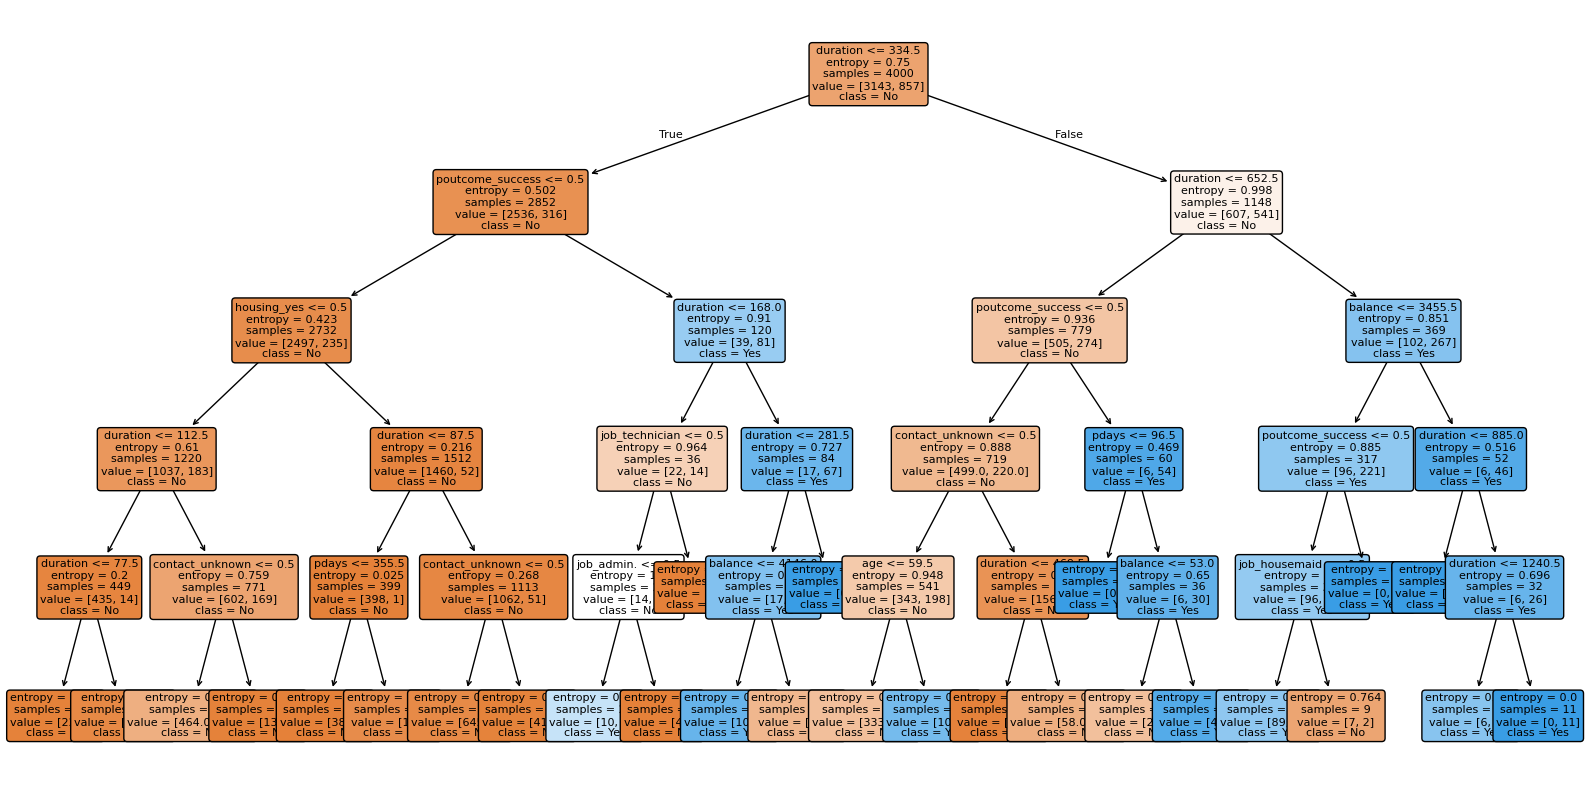

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

x_values = encoded_df.drop(['y_yes', 'y_no'], axis=1)
y_value = encoded_df['y_yes']
full_dtree=DecisionTreeClassifier(criterion='entropy',random_state=16, max_depth = 5)
full_dtree.fit(x_values,y_value)

plt.figure(figsize=(20,10))
plt.title("Whole decision tree", fontsize=20)
plot_tree(full_dtree,feature_names=x_values.columns,filled=True,rounded=True,class_names=['No', 'Yes'], fontsize=8)
plt.show()

Visualizing age by grouping them in bins

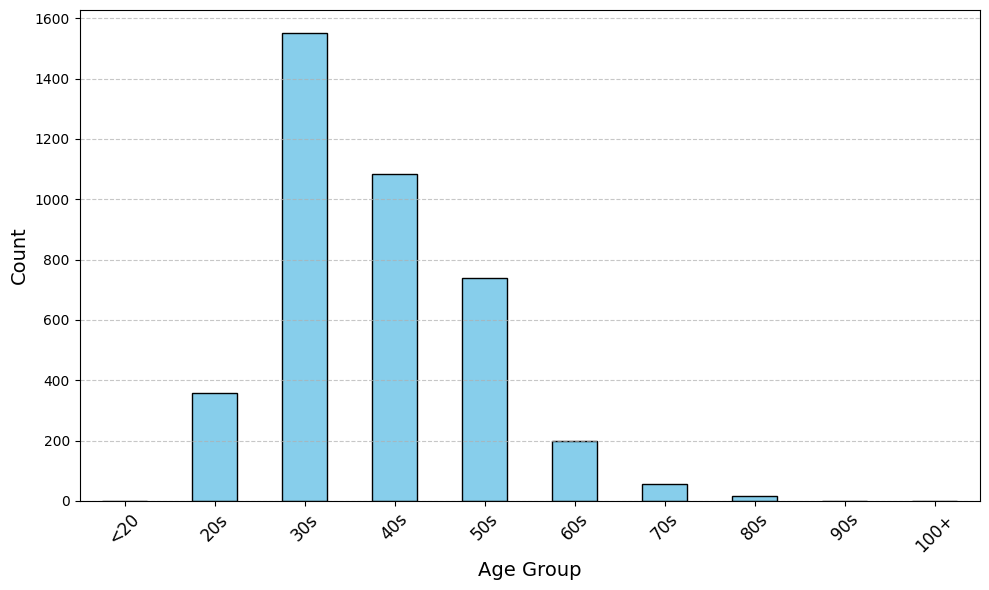

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Defining bins and labels for age groups
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99, 110]
labels = ["<20", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "100+"]

# Creating a new column for age groups
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Counting the number of observations in each age group
age_group_counts = df['Age Group'].value_counts().sort_index()

# Plotting the distribution as a bar chart
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Checking for outliers using box plot

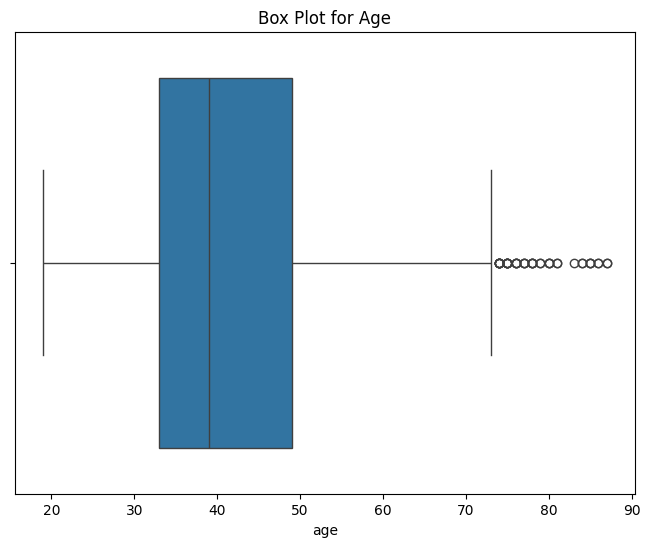

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Boxplot for 'age' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot for Age')
plt.show()

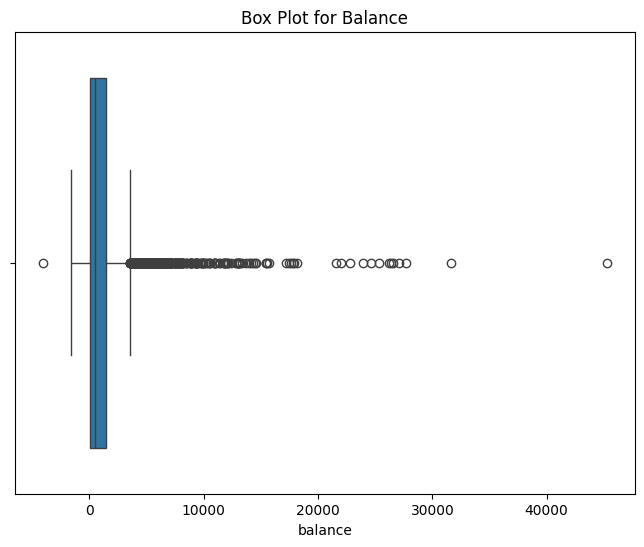

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['balance'])
plt.title('Box Plot for Balance')
plt.show()

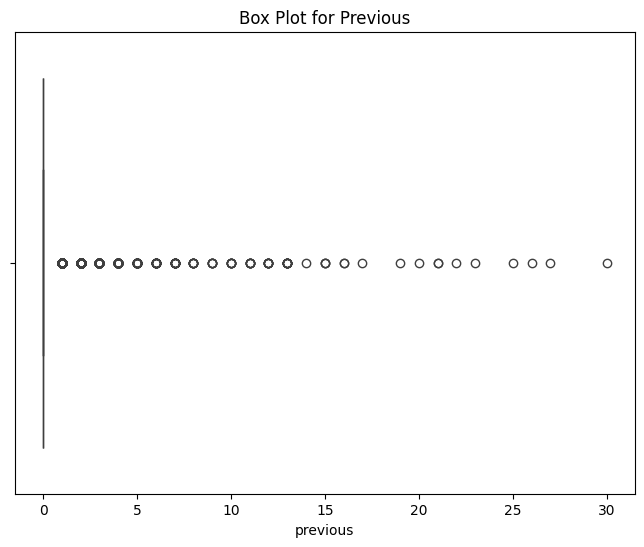

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['previous'])
plt.title('Box Plot for Previous')
plt.show()

Observed that there are outliers present in age and balance columns hence removing them for better model accuracy

In [ ]:
# Calculating mean and standard deviation for balance and age columns where outliers are present
balance_mean = encoded_df['balance'].mean()
balance_std = encoded_df['balance'].std()

age_mean = encoded_df['age'].mean()
age_std = encoded_df['age'].std()

# Outliers are values that are more than 3 Standard Deviations from the mean
balance_lower_bound = balance_mean - 3 * balance_std
balance_upper_bound = balance_mean + 3 * balance_std

age_lower_bound = age_mean - 3 * age_std
age_upper_bound = age_mean + 3 * age_std

# Filtering rows where 'balance' and 'age' values are within 3 standard deviations
outliers_removed_df = encoded_df[
    (encoded_df['balance'] >= balance_lower_bound) & (encoded_df['balance'] <= balance_upper_bound) &
    (encoded_df['age'] >= age_lower_bound) & (encoded_df['age'] <= age_upper_bound)
]


Plotting correlation matrix for numerical fields

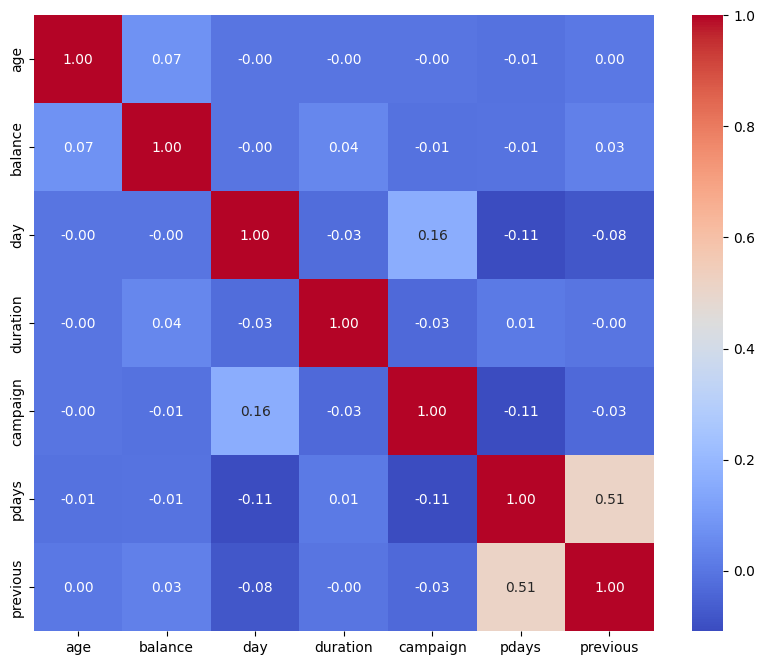

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Extract numerical columns
numerical_df = df.select_dtypes(include=['int64'])

# Compute correlation
numerical_correlation = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Splitting testing and training dataset and creating mode model as baseline for evaluating other models.

In [ ]:
from sklearn import dummy
from sklearn.model_selection import train_test_split
encoded_filtered_df = pd.get_dummies(outliers_removed_df,dtype=int)

#dropping the duration column since is not available for new calls

x_values = encoded_filtered_df.drop(['y_yes', 'y_no','duration'], axis=1)
y_value = encoded_filtered_df['y_yes']
# setting up training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size=0.2, random_state=42)

# creating a dummy classifier (Mode model) as our baseline
dc = dummy.DummyClassifier()

# Fitting the model on the training set
dc.fit(X_train, Y_train)

# Obtaining the score (performance) of our classifier on the testing set
score = dc.score(X_test, Y_test)

#-- print the results
print("Baseline Accuracy:", score)
print("Total Rows:", len(y_value))

Baseline Accuracy: 0.8123393316195373
Total Rows: 3890


Cross validation for baseline - Mode model

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#setting up our folds for cross validation
folds = KFold(n_splits=5, shuffle=True, random_state=42)

dc = dummy.DummyClassifier()

# testing with cross validation
dc_scores = cross_val_score(dc, x_values, y_value, scoring='accuracy', cv=folds)

# printing the results
print("Baseline Accuracy:", np.mean(dc_scores))
print(len(y_value))

Baseline Accuracy: 0.7912596401028278
3890


Creating models to compare

In [ ]:
from sklearn import linear_model, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

#Scaling the features using StandardScaler because the LR model is failing to converge
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_values)

#Creating classifiers to compare
lr = linear_model.LogisticRegression(max_iter=3000, random_state=42)  # Logistic Regression
dt = tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=7, random_state=42)  # Decision Tree
knn = KNeighborsClassifier(n_neighbors=5)

#Setting up K-Fold cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#Cross-validation for accuracy scores
lr_scores = cross_val_score(lr, x_scaled, y_value, scoring='accuracy', cv=folds)
dt_scores = cross_val_score(dt, x_scaled, y_value, scoring='accuracy', cv=folds)
knn_scores = cross_val_score(knn, x_scaled, y_value, scoring='accuracy', cv=folds)

#Predictions for metrics
lr_pred = cross_val_predict(lr, x_scaled, y_value, cv=folds)
dt_pred = cross_val_predict(dt, x_scaled, y_value, cv=folds)
knn_pred = cross_val_predict(knn, x_scaled, y_value, cv=folds)

#Creating a Function to calculate specificity
def calculate_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Extracting values from the confusion matrix
    specificity = tn / (tn + fp)
    return specificity

#Computing metrics for each model
print("Performance Metrics for Models:")

# Logistic Regression
print("\nLogistic Regression:")
lr_specificity = calculate_specificity(y_value, lr_pred)
print("Mean Accuracy: ", np.mean(lr_scores))
print("Precision: ",precision_score(y_value, lr_pred))
print("F1 Score: ",f1_score(y_value, lr_pred))
print("Specificity: ",lr_specificity)

# Decision Tree
print("\nDecision Tree:")
dt_specificity = calculate_specificity(y_value, dt_pred)
print("Mean Accuracy: ",np.mean(dt_scores))
print("Precision: ", precision_score(y_value, dt_pred))
print("F1 Score: ", f1_score(y_value, dt_pred))
print("Specificity: ", dt_specificity)

# KNN
print("\nK-Nearest Neighbors:")
knn_specificity = calculate_specificity(y_value, knn_pred)
print("Mean Accuracy: ",np.mean(knn_scores))
print("Precision: ",precision_score(y_value, knn_pred))
print("F1 Score: ", f1_score(y_value, knn_pred))
print("Specificity: ", knn_specificity)

Performance Metrics for Models:

Logistic Regression:
Mean Accuracy:  0.8192802056555271
Precision:  0.7443946188340808
F1 Score:  0.3207729468599034
Specificity:  0.9814814814814815

Decision Tree:
Mean Accuracy:  0.767866323907455
Precision:  0.43010752688172044
F1 Score:  0.3827751196172249
Specificity:  0.8794671864847303

K-Nearest Neighbors:
Mean Accuracy:  0.7961439588688947
Precision:  0.5228915662650603
F1 Score:  0.3537082314588427
Specificity:  0.935672514619883


Hypertuning parameters for LR and testing on test data

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.1}
Best Cross-Validation Accuracy Score: 0.2042082818987768

Test Set Metrics:
Accuracy:  0.8303341902313625
F1 Score:  0.2903225806451613
Specificity:  0.9794303797468354
Recall:  0.18493150684931506


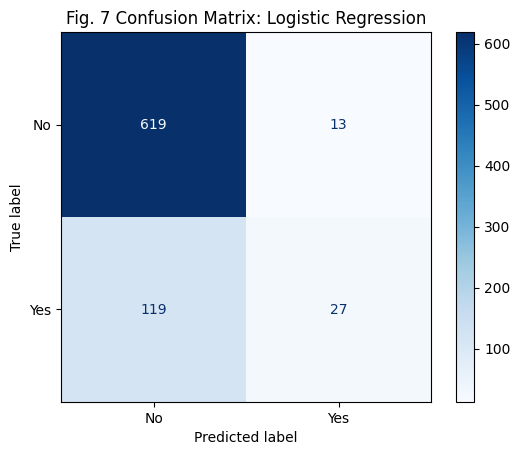

In [ ]:
#Optimized using AI
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, make_scorer, recall_score

# Creating a function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    return specificity

# Create a scorer that combines accuracy and specificity
specificity_scorer = make_scorer(specificity_score, greater_is_better=True)
#Tuning hyperparameters to maximize performance
# Defining the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2'],             # Regularization techniques
    'C': [0.01, 0.1, 1],               # Regularization strength
    'tol': [1e-1, 1e0, 1e1],            # Convergence threshold
    'max_iter': [100, 500, 1000],       # Maximum iterations
    'solver': ['liblinear']             # Solver
}

# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring={'recall': 'recall', 'specificity': specificity_scorer},  # Multiple metrics
    refit='recall',  # Optimize for recall
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fitting the model on the training data
grid_search.fit(X_train, Y_train)

# Printing Best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy Score:", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
Y_test_pred = best_model.predict(X_test)

# Calculating metrics on the test set
accuracy = accuracy_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)
specificity = specificity_score(Y_test, Y_test_pred)
recall = recall_score(Y_test, Y_test_pred)

print("\nTest Set Metrics:")
print("Accuracy: ",accuracy)
print("F1 Score: ",f1)
print("Specificity: ",specificity)
print("Recall: ", recall)

# Displaying the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_test_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
cmd.plot(cmap='Blues', values_format='d')
plt.title("Fig. 7 Confusion Matrix: Logistic Regression")
plt.show()

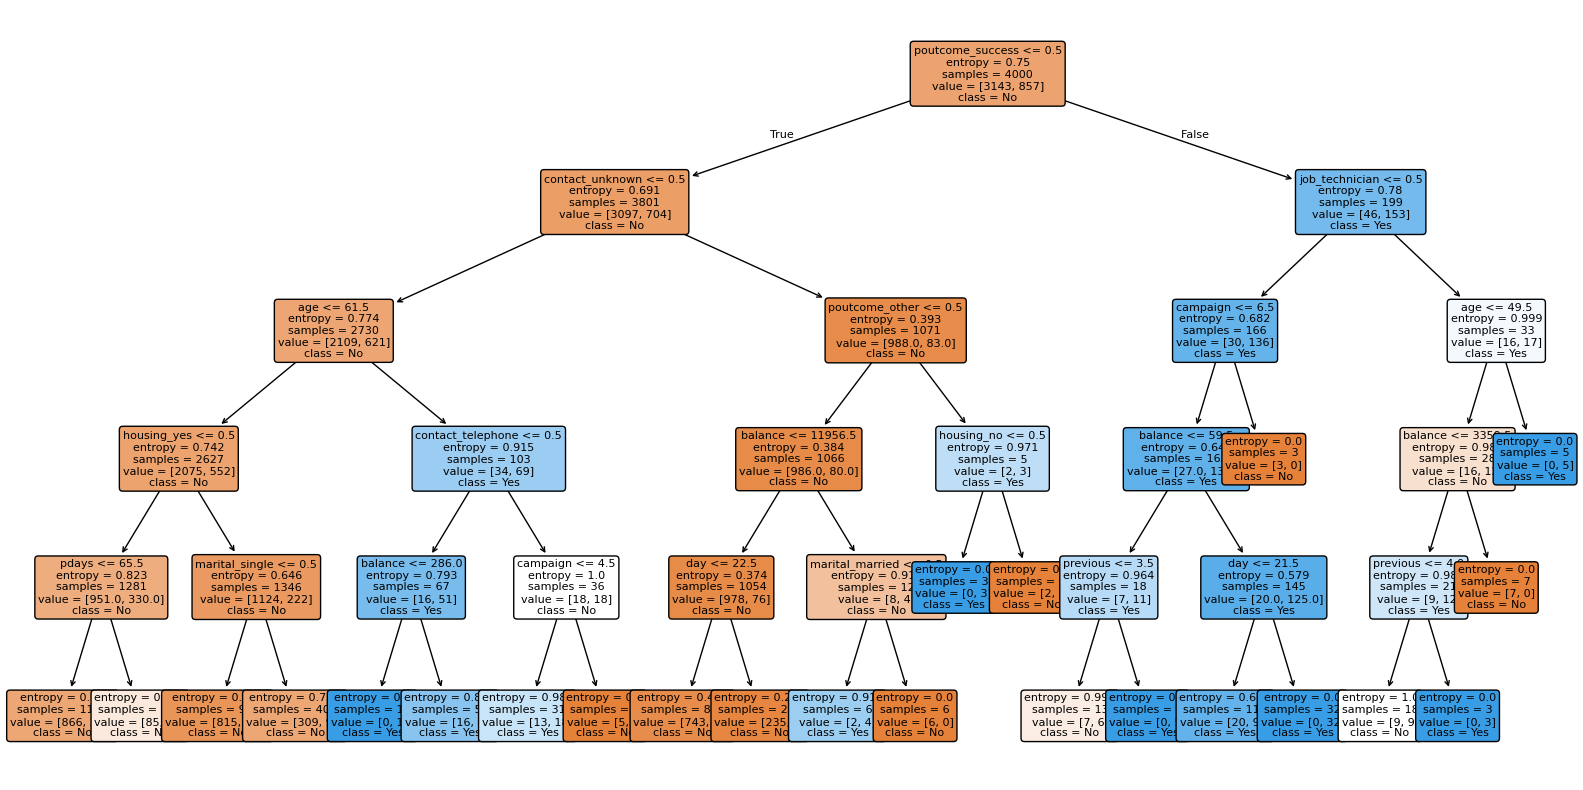

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

x_values = encoded_df.drop(['y_yes', 'y_no','duration'], axis=1)
y_value = encoded_df['y_yes']
full_dtree=DecisionTreeClassifier(criterion='entropy',random_state=16, max_depth = 5)
full_dtree.fit(x_values,y_value)

plt.figure(figsize=(20,10))
plt.title("Without duration decision tree", fontsize=20)
plot_tree(full_dtree,feature_names=x_values.columns,filled=True,rounded=True,class_names=['No', 'Yes'], fontsize=8)
plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best Cross-Validation Accuracy Score: 0.31237795982493544

Test Set Metrics:
Accuracy:  0.7686375321336761
F1 Score:  0.35251798561151076
Specificity:  0.8686708860759493
Recall:  0.3356164383561644


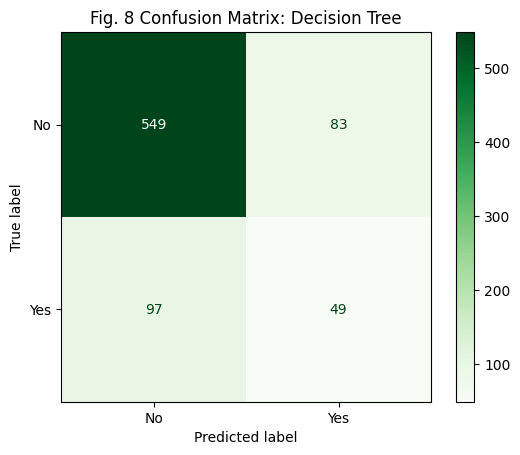

In [ ]:
#Optimized using AI
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, make_scorer, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Defining specificity metric
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    return specificity

# Creating a scorer that combines accuracy and specificity
specificity_scorer = make_scorer(specificity_score, greater_is_better=True)

# Defining the parameter grid for Decision Tree
param_grid = {
    'max_depth': [15, 8, 10],             # Depth of the tree
    'min_samples_split': [4, 2, 3],           # Minimum samples to split a node
    'min_samples_leaf': [4, 2, 3],            # Minimum samples at a leaf node
    'criterion': ['gini', 'entropy']           # Splitting criteria
}

# Initializing the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring={'recall': 'recall', 'specificity': specificity_scorer},  # Multiple metrics
    refit='recall',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Utilize all available CPUs
)

# Fitting the model on the training data
grid_search.fit(X_train, Y_train)

# Best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy Score:", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
Y_test_pred = best_model.predict(X_test)

# Calculating metrics on the test set
accuracy = accuracy_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)
recall = recall_score(Y_test, Y_test_pred)
specificity = specificity_score(Y_test, Y_test_pred)

print("\nTest Set Metrics:")
print("Accuracy: ",accuracy)
print("F1 Score: ",f1)
print("Specificity: ", specificity)
print("Recall: ", recall)

# Displaying the confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
cmd.plot(cmap='Greens', values_format='d')
plt.title("Fig. 8 Confusion Matrix: Decision Tree")
plt.show()


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy Score: 0.19672315116148575

Test Set Metrics:
Accuracy: 0.7609
F1 Score: 0.2734
Specificity: 0.8813
Recall:  0.23972602739726026


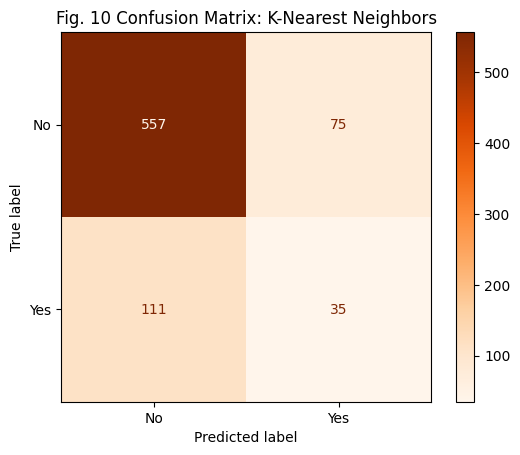

In [ ]:
#Optimized using AI
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, make_scorer, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Defining specificity metric
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    return specificity

# Creating a scorer that combines accuracy and specificity
specificity_scorer = make_scorer(specificity_score, greater_is_better=True)

# Defining the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 10],          # Number of neighbors to consider
    'weights': ['uniform'], # Weight function
    'metric': ['manhattan']  # Distance metric
}

# Initializing the KNN model
knn = KNeighborsClassifier()

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring={'recall': 'recall', 'specificity': specificity_scorer},  # Multiple metrics
    refit='recall',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Utilize all available CPUs
)

# Fitting the model on the training data
grid_search.fit(X_train, Y_train)

# Best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy Score:", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
Y_test_pred = best_model.predict(X_test)

# Calculating metrics on the test set
accuracy = accuracy_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)
specificity = specificity_score(Y_test, Y_test_pred)
recall = recall_score(Y_test, Y_test_pred)

print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Recall: ", recall)

# Displaying the confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
cmd.plot(cmap='Oranges', values_format='d')
plt.title("Fig. 10 Confusion Matrix: K-Nearest Neighbors")
plt.show()
